In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

print("Preparado para implementar Ridge Regression manual (Capitulo 3.4)")

Preparado para implementar Ridge Regression manual (Capitulo 3.4)


In [2]:
# Numero de Observaciones
N = 100

# Generemos 5 prediciones (X1 a X5) correlacionado
# Para simular multicolianealidad X2 ≈ X1 + ruido pequeño, etc.
X_base = np.random.normal(0, 1, N)
X = np.column_stack([
    X_base,
    X_base + np.random.normal(0, 0.3, N),    # X2 muy correlacionado con X1
    X_base + np.random.normal(0, 0.4, N),    # X3
    np.random.normal(0, 1, N),              # X4 independiente
    np.random.normal(0, 1, N)               # X5 independiente
])

# Verdaderos coeficientes (β verdaderos)
beta_verdaderos = np.array([3.0, 2.5, -1.5, 0.8, 1.2])

# Intercepto (agregamos columnas de unos mas adelante)
intercepto_verdadero = 4.0

# y = Xβ + ε
sigma_ruido = 3.0
epsilon = np.random.normal(0, sigma_ruido, N)
y = intercepto_verdadero + X @ beta_verdaderos + epsilon

print("Datos generados: X shape:", X.shape, "y shape:", y.shape)
print("Coeficientes verdaderos β:", beta_verdaderos)


Datos generados: X shape: (100, 5) y shape: (100,)
Coeficientes verdaderos β: [ 3.   2.5 -1.5  0.8  1.2]


In [3]:
# Matriz de diseño completa: columna de unos + predictores
X_design = np.column_stack((np.ones(N), X))  # shape (N, 6): intercepto + 5 vars
print("Matriz X_design shape:", X_design.shape)



Matriz X_design shape: (100, 6)


In [4]:
def ridge_regression(X, y, lambda_param=0.0):
    """
    Ridge regression manual.
    lambda_param = 0 → OLS normal
    lambda_param = 0 → ridge
    """
    n, p = X.shape # n observaciones, p parametros (incluyendo intercepto)

    # Matriz identidad para penalizacion (solo sobre los coeficientes, NO intercepto)
    I = np.eye(p)
    I[0, 0] = 0 # No penalizamos el intercepto

    # (X^T X + λI)^-1 X^T y
    XtX_plus_lambdaI = X.T @ X + lambda_param * I
    XtX_inv = np.linalg.inv(XtX_plus_lambdaI)
    betas_ridge = XtX_inv @ X.T @ y

    return betas_ridge

# Prueba con OLS (lambda=0)
betas_ols = ridge_regression(X_design, y, lambda_param=0.0)

print("¡Llegué aquí! betas_ols calculado.")
print("Forma de betas_ols:", betas_ols.shape)  # debería ser (6,)
print("OLS (λ=0):")
print("Intercepto estimado:", betas_ols[0])
print("Coeficientes estimados:", betas_ols[1:])

¡Llegué aquí! betas_ols calculado.
Forma de betas_ols: (6,)
OLS (λ=0):
Intercepto estimado: 3.5994694710577697
Coeficientes estimados: [ 4.72952851  1.2206816  -2.39952294  1.01785448  0.90378739]


In [5]:
# Prueba con Ridge (λ > 0)
lambda_ridge = 1000  # Empieza con 10, luego prueba 1, 100, 1000

betas_ridge = ridge_regression(X_design, y, lambda_param=lambda_ridge)

print(f"Ridge (λ={lambda_ridge}):")
print("Intercepto estimado:", betas_ridge[0])
print("Coeficientes estimados:", betas_ridge[1:])

Ridge (λ=1000):
Intercepto estimado: 3.2874385975874096
Coeficientes estimados: [0.19738436 0.20058119 0.16738585 0.05028819 0.08989129]


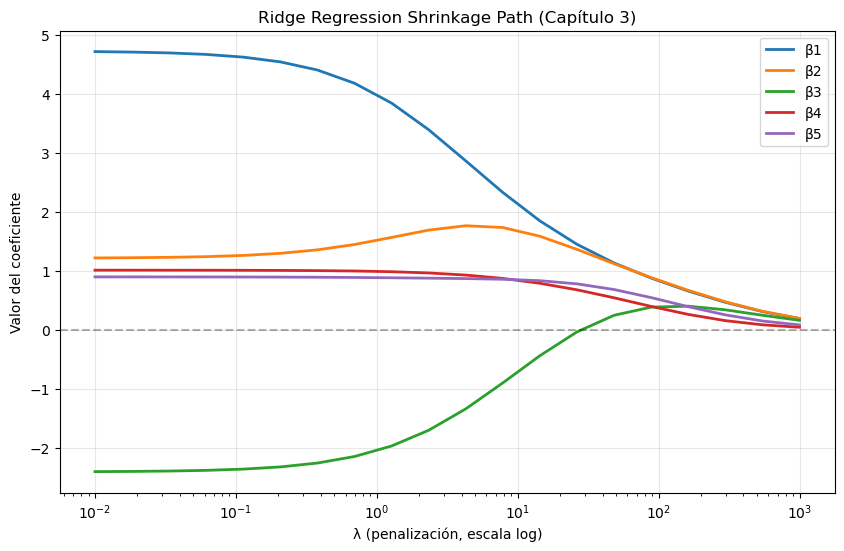

In [6]:
lambdas = np.logspace(-2, 3, 20)  # de 0.01 a 1000
coef_path = np.zeros((len(lambdas), 5))  # 5 coeficientes

for i, lam in enumerate(lambdas):
    betas = ridge_regression(X_design, y, lam)
    coef_path[i] = betas[1:]  # sin intercepto

plt.figure(figsize=(10, 6))
for j in range(5):
    plt.plot(lambdas, coef_path[:, j], label=f'β{j+1}', linewidth=2)

plt.xscale('log')
plt.xlabel('λ (penalización, escala log)')
plt.ylabel('Valor del coeficiente')
plt.title('Ridge Regression Shrinkage Path (Capítulo 3)')
plt.axhline(0, color='k', linestyle='--', alpha=0.3)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()